In [1]:
# Exploratory Data Analysis (EDA):
import pandas as pd
# Load the dataset
file_path = "D:\Excelr\Data Science\Data Science Assignment\PCA\PCA\wine.csv"
wine_data = pd.read_csv(file_path)
# summary statistics
wine_data_info = wine_data.info()
wine_data_head = wine_data.head()
wine_data_description = wine_data.describe()

wine_data_info, wine_data_head, wine_data_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


(None,
    Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
 0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
 1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
 2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
 3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
 4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   
 
    Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
 0           0.28             2.29   5.64  1.04      3.92     1065  
 1           0.26             1.28   4.38  1.05      3.40     1050  
 2           0.30             2.81   5.68  1.03      3.17     1185  
 3           0.24             2.18   7.80  0.86      3.45     1480  
 4           0.39             1.82   4.32  1.04      2.93      735  ,
              Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
 count  178.000000  178.00

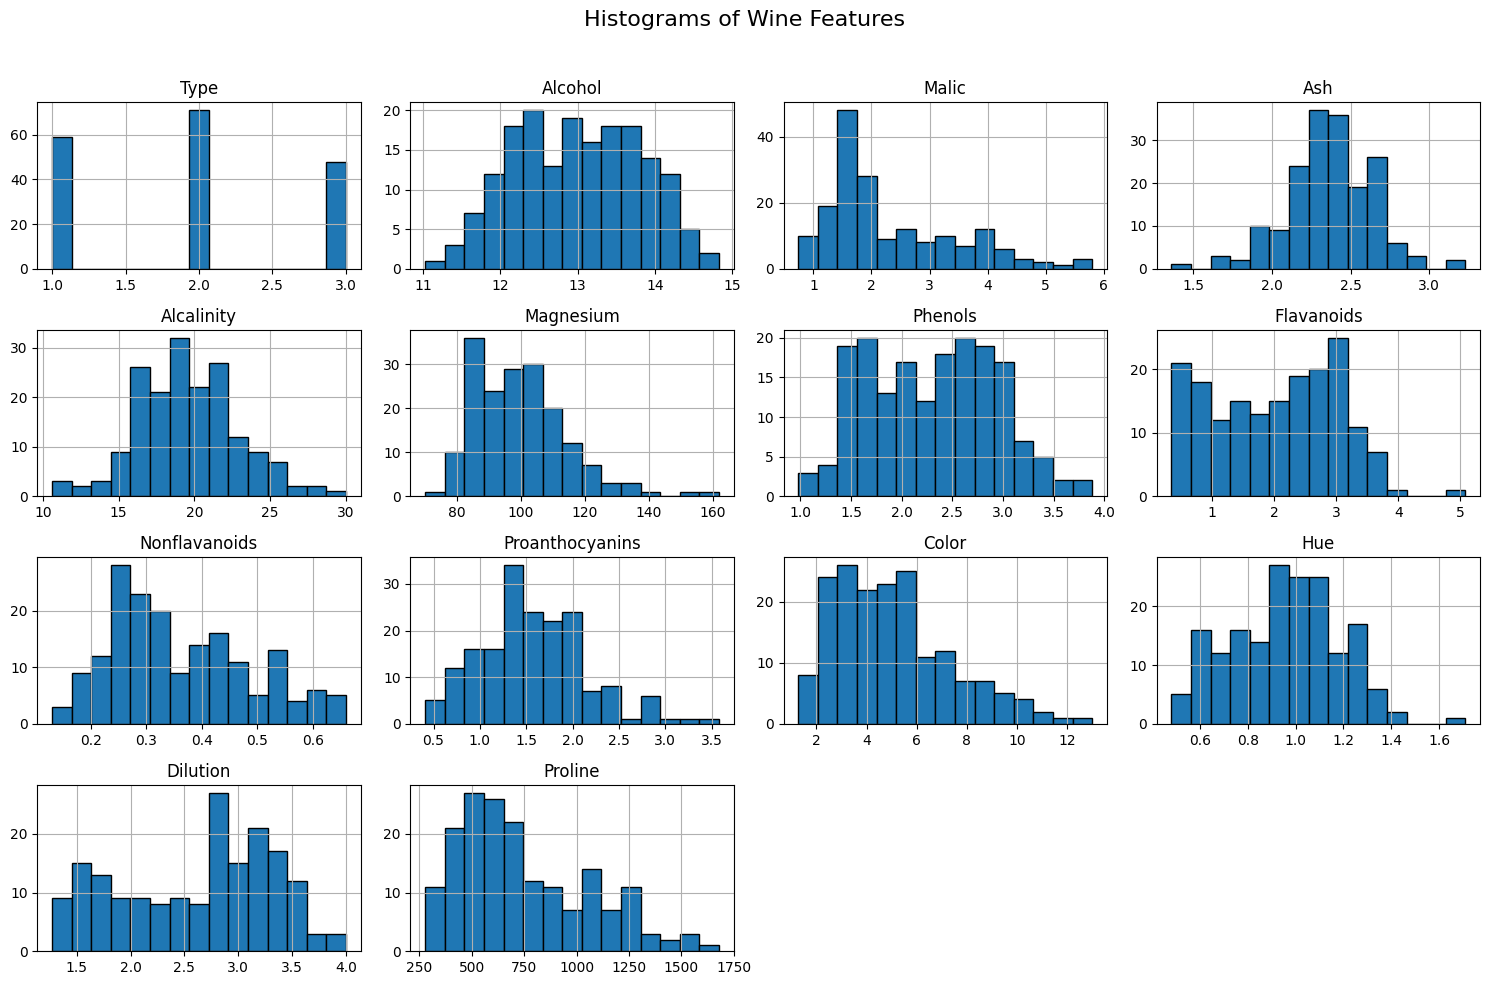

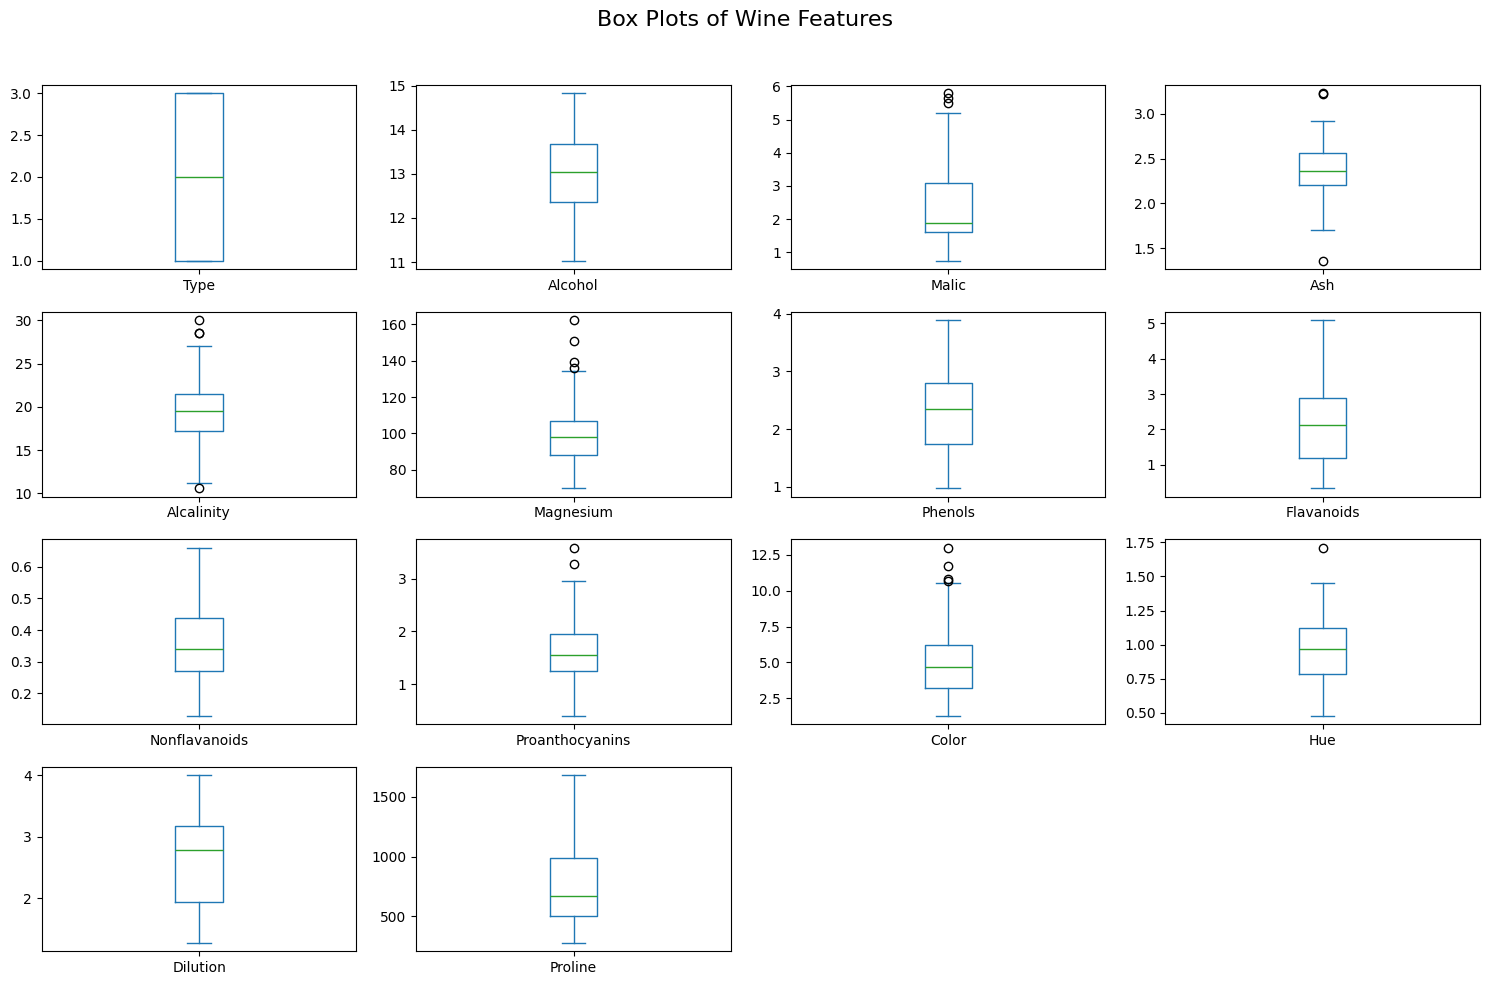

In [2]:
import matplotlib.pyplot as plt

# Plot histograms for all the numerical features
wine_data.hist(bins=15, figsize=(15, 10), layout=(4, 4), edgecolor='black')
plt.suptitle('Histograms of Wine Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
# Plot box plots for all the numerical features
wine_data.plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 10), sharex=False, sharey=False)
plt.suptitle('Box Plots of Wine Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

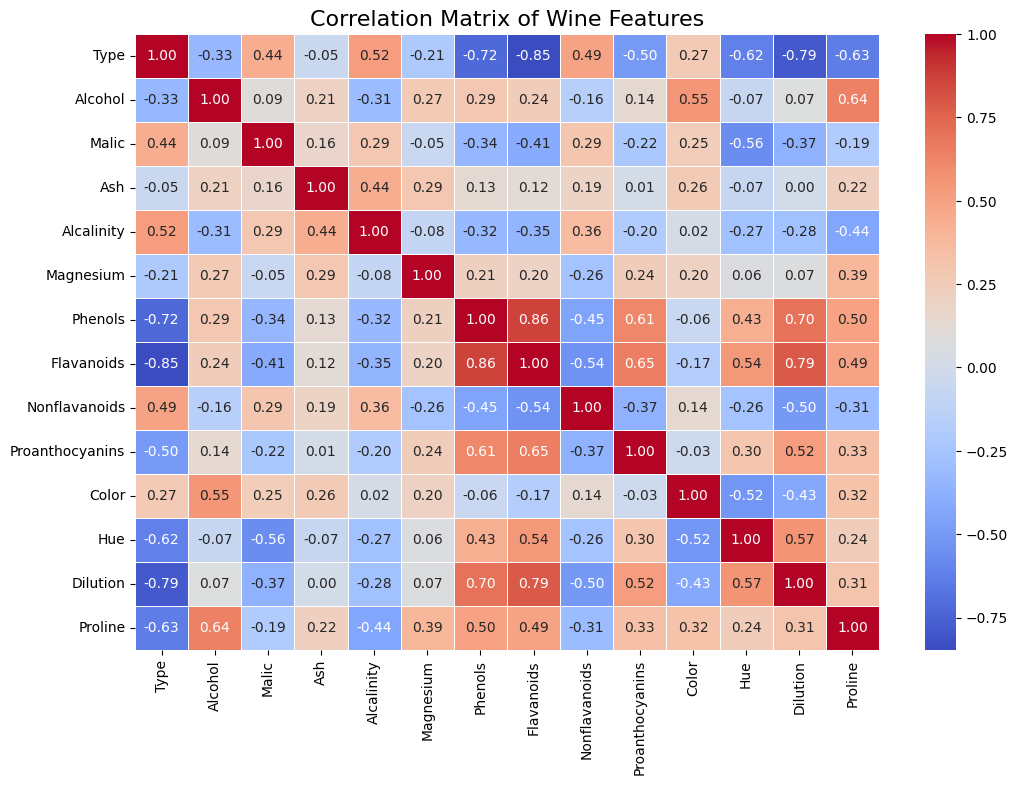

In [3]:
import seaborn as sns
import numpy as np

# correlation matrix
corr_matrix = wine_data.corr()
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Wine Features', fontsize=16)
plt.show()

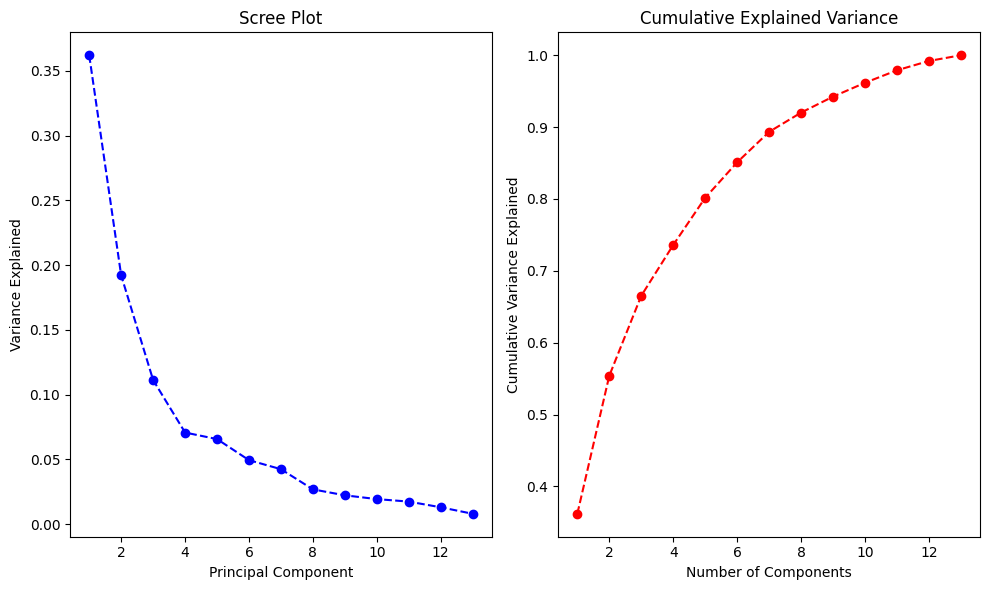

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the features (excluding the 'Type' column)
features = wine_data.drop(columns=['Type'])
scaler = StandardScaler()
standardized_data = scaler.fit_transform(features)
# Apply PCA
pca = PCA()
pca.fit(standardized_data)
# explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
# Scree plot and cumulative explained variance plot
plt.figure(figsize=(10, 6))
# Scree plot
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', color='b')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
# explained variance plot
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--', color='r')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')

plt.tight_layout()
plt.show()

In [5]:
# number of components that explain approximately 90% of the variance
n_components = np.argmax(cumulative_variance_ratio >= 0.90) + 1

# Transforming the dataset into principal components
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(standardized_data)

# Convert the PCA result into a DataFrame for better visibility
pca_columns = [f'PC{i+1}' for i in range(n_components)]
pca_df = pd.DataFrame(data=principal_components, columns=pca_columns)


pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880,0.596427,-0.065139
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120,0.053776,-1.024416
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276,0.424205,0.344216
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431,-0.383337,-0.643593
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520,0.444074,-0.416700


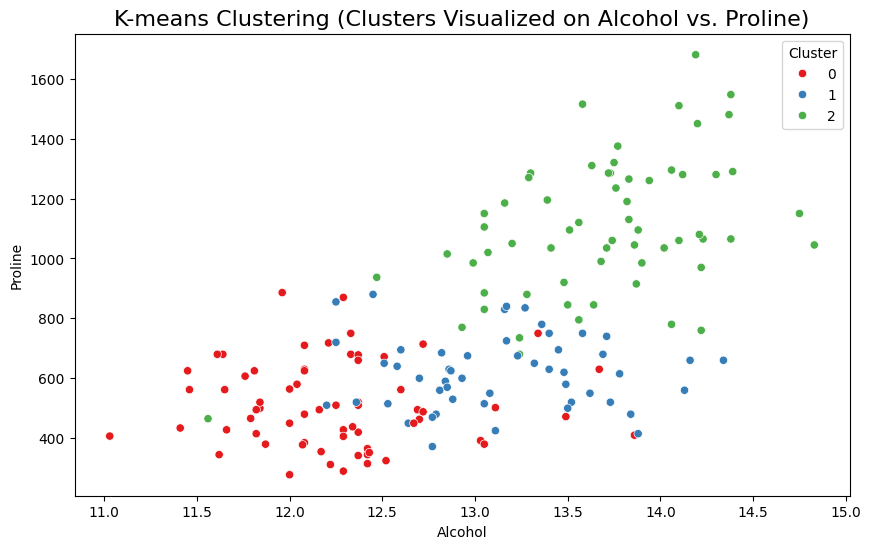

0.2848589191898987

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
wine_data['Cluster'] = kmeans.fit_predict(standardized_data)
# silhouette score to evaluate the clustering
sil_score = silhouette_score(standardized_data, wine_data['Cluster'])
# clusters using a pair plot of some selected features
plt.figure(figsize=(10, 6))
sns.scatterplot(x=wine_data['Alcohol'], y=wine_data['Proline'], hue=wine_data['Cluster'], palette='Set1')
plt.title('K-means Clustering (Clusters Visualized on Alcohol vs. Proline)', fontsize=16)
plt.show()

sil_score

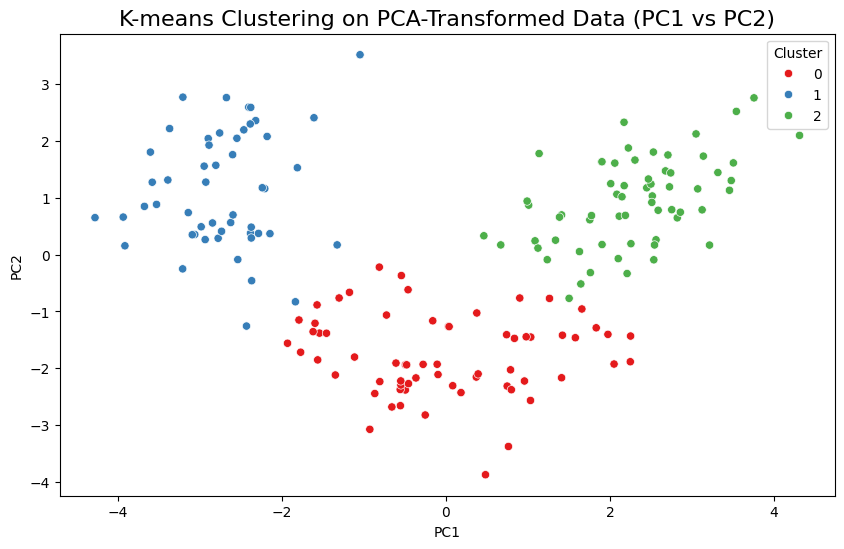

0.3149696954705561

In [7]:
# K-means clustering to the PCA-transformed dataset
kmeans_pca = KMeans(n_clusters=3, random_state=42)
pca_df['Cluster'] = kmeans_pca.fit_predict(principal_components)
# silhouette score for PCA-transformed data
sil_score_pca = silhouette_score(principal_components, pca_df['Cluster'])
# clusters using the first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=pca_df['Cluster'], palette='Set1')
plt.title('K-means Clustering on PCA-Transformed Data (PC1 vs PC2)', fontsize=16)
plt.show()

sil_score_pca